In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NFRP_upper_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00007.00007.4,1,SPAKPVQTITPHGK/4,0.275,0.124,[2],0,0.009,5,0.136,...,-1,0,0,(),Normal,Unk,Unk,1,Target,253317218
1,b1906_293T_proteinID_01A_QE3_122212.00009.00009.2,1,PVTAYDGFVQYIPFDDPR/2,0.097,0.002,[2],0,0.496,21,0.047,...,-1,0,0,(),Normal,Unk,Unk,1,Target,214045763
2,b1906_293T_proteinID_01A_QE3_122212.00013.00013.3,1,DLEDGEVPQHAGK/3,0.306,0.096,[2],0,0.329,45,0.073,...,-1,0,0,(),Normal,Unk,Unk,1,Target,40185654
3,b1906_293T_proteinID_01A_QE3_122212.00014.00014.3,1,RKEEPAGLATR/3,0.163,0.003,[2],0,0.341,62,0.073,...,-1,0,0,(),Normal,Unk,Unk,1,Target,232447257
4,b1906_293T_proteinID_01A_QE3_122212.00016.00016.3,1,NFC[160]SAVQYGNAQIIEC[160]LKENK/3,0.222,0.075,[2],0,-0.002,31,0.063,...,-1,0,0,(),Normal,Unk,Unk,1,Target,197326057


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NFRP_upper_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,PMNVHMDPM[147]K/3,0.130,0.0069,[2],0,0.00271,8,0.0627,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,493236803
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,YQDGHAHK/3,0.023,0.0230,[2],0,0.00100,1,0.0230,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,415688459
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,LVQVTGTK/2,0.138,0.0250,[2],0,0.00500,26,0.0580,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,564085280
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,EQIEQAIEC[160]DQQELDKYK/2,0.095,0.0040,[2],0,0.50100,10,0.0500,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,604431602
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.127,0.0170,[2],0,0.00700,13,0.0520,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,488736032


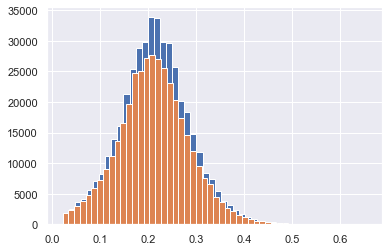

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.0127
0.012079999999999997


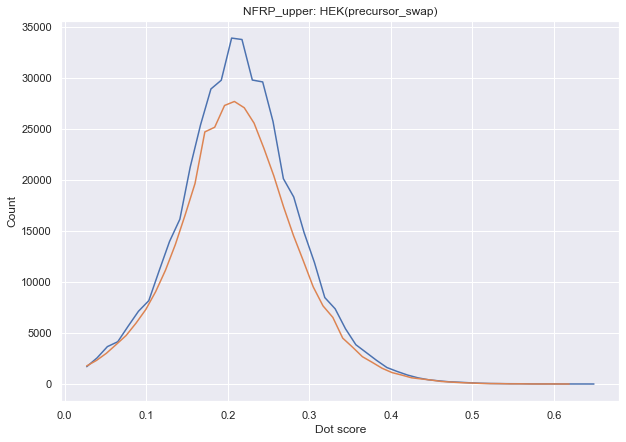

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_upper: HEK(precursor_swap)')
plt.plot(nnt1[1][:-1] + 0.006, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.006, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

433585
386264


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
"""

score:  0.001
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.002
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.003
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.004
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.005
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.006
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.007
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.008
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.009000000000000001
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.010000000000000002
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.011000000000000003
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.012000000000000004
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.013000000000000005
nnt:  433585
nnd:  386264
FDR:  0.8908610768361451


score:  0.014000000000000005
nnt:  433585
nnd:  386264

nnt:  404864
nnd:  358629
FDR:  0.8858011579196965


score:  0.10400000000000008
nnt:  404157
nnd:  357970
FDR:  0.8857201533067595


score:  0.10500000000000008
nnt:  403475
nnd:  357307
FDR:  0.8855740752215131


score:  0.10600000000000008
nnt:  402763
nnd:  356664
FDR:  0.8855431109610367


score:  0.10700000000000008
nnt:  402036
nnd:  356013
FDR:  0.8855251768498343


score:  0.10800000000000008
nnt:  401342
nnd:  355279
FDR:  0.8852275615310633


score:  0.10900000000000008
nnt:  400587
nnd:  354579
FDR:  0.8851485445109302


score:  0.11000000000000008
nnt:  399848
nnd:  353863
FDR:  0.8849937976431044


score:  0.11100000000000008
nnt:  399077
nnd:  353083
FDR:  0.8847490584523788


score:  0.11200000000000009
nnt:  398275
nnd:  352352
FDR:  0.8846952482581131


score:  0.11300000000000009
nnt:  397441
nnd:  351578
FDR:  0.8846042557260071


score:  0.11400000000000009
nnt:  396614
nnd:  350774
FDR:  0.8844216290902489


score:  0.11500000000000009
nnt:  395747
nnd:  349944
FD

nnt:  233286
nnd:  200924
FDR:  0.8612775734506143


score:  0.20700000000000016
nnt:  230703
nnd:  198638
FDR:  0.8610117770466791


score:  0.20800000000000016
nnt:  228058
nnd:  196306
FDR:  0.8607722596883249


score:  0.20900000000000016
nnt:  225476
nnd:  194014
FDR:  0.8604640848693431


score:  0.21000000000000016
nnt:  222890
nnd:  191739
FDR:  0.8602404773655167


score:  0.21100000000000016
nnt:  220259
nnd:  189407
FDR:  0.8599285386749236


score:  0.21200000000000016
nnt:  217622
nnd:  187099
FDR:  0.8597430406852249


score:  0.21300000000000016
nnt:  215093
nnd:  184779
FDR:  0.8590656134788208


score:  0.21400000000000016
nnt:  212438
nnd:  182505
FDR:  0.8590977132151498


score:  0.21500000000000016
nnt:  209789
nnd:  180196
FDR:  0.8589392198828346


score:  0.21600000000000016
nnt:  207159
nnd:  177898
FDR:  0.8587510076800912


score:  0.21700000000000016
nnt:  204451
nnd:  175679
FDR:  0.8592719037813461


score:  0.21800000000000017
nnt:  201901
nnd:  173373
FD

score:  0.3100000000000002
nnt:  38813
nnd:  32987
FDR:  0.8498956535181511


score:  0.3110000000000002
nnt:  38007
nnd:  32286
FDR:  0.8494750966927145


score:  0.3120000000000002
nnt:  37137
nnd:  31634
FDR:  0.8518189406791071


score:  0.3130000000000002
nnt:  36330
nnd:  30996
FDR:  0.8531791907514451


score:  0.3140000000000002
nnt:  35541
nnd:  30349
FDR:  0.853915196533581


score:  0.3150000000000002
nnt:  34737
nnd:  29736
FDR:  0.8560324725796701


score:  0.3160000000000002
nnt:  33980
nnd:  29056
FDR:  0.8550912301353738


score:  0.3170000000000002
nnt:  33278
nnd:  28421
FDR:  0.8540477192138951


score:  0.3180000000000002
nnt:  32541
nnd:  27781
FDR:  0.8537229956055438


score:  0.31900000000000023
nnt:  31815
nnd:  27139
FDR:  0.853025302530253


score:  0.32000000000000023
nnt:  31125
nnd:  26527
FDR:  0.8522730923694779


score:  0.32100000000000023
nnt:  30398
nnd:  25914
FDR:  0.852490295414172


score:  0.32200000000000023
nnt:  29740
nnd:  25336
FDR:  0.8519

nnt:  2612
nnd:  2374
FDR:  0.9088820826952527


score:  0.4200000000000003
nnt:  2534
nnd:  2321
FDR:  0.9159431728492502


score:  0.4210000000000003
nnt:  2476
nnd:  2257
FDR:  0.9115508885298869


score:  0.4220000000000003
nnt:  2429
nnd:  2195
FDR:  0.9036640592836558


score:  0.4230000000000003
nnt:  2369
nnd:  2142
FDR:  0.9041789784719291


score:  0.4240000000000003
nnt:  2305
nnd:  2086
FDR:  0.9049891540130152


score:  0.4250000000000003
nnt:  2241
nnd:  2039
FDR:  0.9098616688978135


score:  0.4260000000000003
nnt:  2180
nnd:  1993
FDR:  0.9142201834862386


score:  0.4270000000000003
nnt:  2123
nnd:  1949
FDR:  0.9180405087140838


score:  0.4280000000000003
nnt:  2071
nnd:  1899
FDR:  0.9169483341380975


score:  0.4290000000000003
nnt:  2026
nnd:  1871
FDR:  0.9234945705824285


score:  0.4300000000000003
nnt:  1974
nnd:  1815
FDR:  0.9194528875379939


score:  0.4310000000000003
nnt:  1921
nnd:  1766
FDR:  0.9193128578865174


score:  0.43200000000000033
nnt:  1867


nnd:  84
FDR:  0.6511627906976745


score:  0.5330000000000004
nnt:  127
nnd:  82
FDR:  0.6456692913385826


score:  0.5340000000000004
nnt:  126
nnd:  80
FDR:  0.6349206349206349


score:  0.5350000000000004
nnt:  124
nnd:  73
FDR:  0.5887096774193549


score:  0.5360000000000004
nnt:  121
nnd:  71
FDR:  0.5867768595041323


score:  0.5370000000000004
nnt:  121
nnd:  71
FDR:  0.5867768595041323


score:  0.5380000000000004
nnt:  120
nnd:  67
FDR:  0.5583333333333333


score:  0.5390000000000004
nnt:  116
nnd:  64
FDR:  0.5517241379310345


score:  0.5400000000000004
nnt:  110
nnd:  62
FDR:  0.5636363636363636


score:  0.5410000000000004
nnt:  103
nnd:  59
FDR:  0.5728155339805825


score:  0.5420000000000004
nnt:  98
nnd:  59
FDR:  0.6020408163265306


score:  0.5430000000000004
nnt:  93
nnd:  58
FDR:  0.6236559139784946


score:  0.5440000000000004
nnt:  89
nnd:  57
FDR:  0.6404494382022472


score:  0.5450000000000004
nnt:  88
nnd:  54
FDR:  0.6136363636363636


score:  0.546000000

'\n결과\nscore:  0.4980000000000004\nnnt:  277943\nnnd:  2773\nFDR:  0.009976865760245805\n'